following https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/04-One-Dimensional-Kalman-Filters.ipynb

## Kalman Gain

\begin{align}
\mu &= \frac{\bar \sigma^2 \mu_z + \sigma_z^2 \bar \mu}{\bar \sigma^2 + \sigma_z^2} \\
&= \bar \mu + K (\mu_z - \bar \mu)
\end{align}

where the Kalman gain is defined as $K=\frac{\bar \sigma^2}{\bar \sigma^2 + \sigma_z^2}$. 관측이 믿을만한 경우 $\sigma_z \rightarrow 0$이고, $K \rightarrow 1$이라 관측 결과를 그대로 읽으면 된다. 즉 $\mu \rightarrow \mu_z$가 된다. 반대인 경우 관측 분산이 상대적으로 커서 관측 결과를 내부 상태의 반영으로 그대로 간주하기 힘들기에 $K \rightarrow 0$이 되어 $\mu \rightarrow \bar \mu$가 된다.

## Kalman filter

<u>**Predict**</u>

$\begin{array}{|l|l|l|}
\hline
\text{Univariate} & \text{Univariate} & \text{Multivariate}\\
& \text{(Kalman form)} & \\
\hline
\bar \mu = \mu + \mu_{f_x} & \bar x = x + dx & \bar{\mathbf x} = \mathbf{Fx} + \mathbf{Bu}\\
\bar\sigma^2 = \sigma_x^2 + \sigma_{f_x}^2 & \bar P = P + Q & \bar{\mathbf P} = \mathbf{FPF}^\mathsf T + \mathbf Q \\
\hline
\end{array}$

<u>**Update**</u>

$\begin{array}{|l|l|l|}
\hline
\text{Univariate} & \text{Univariate} & \text{Multivariate}\\
& \text{(Kalman form)} & \\
\hline
& y = z - \bar x & \mathbf y = \mathbf z - \mathbf{H\bar x} \\
& K = \frac{\bar P}{\bar P+R}&
\mathbf K = \mathbf{\bar{P}H}^\mathsf T (\mathbf{H\bar{P}H}^\mathsf T + \mathbf R)^{-1} \\
\mu=\frac{\bar\sigma^2\, \mu_z + \sigma_z^2 \, \bar\mu} {\bar\sigma^2 + \sigma_z^2} & x = \bar x + Ky & \mathbf x = \bar{\mathbf x} + \mathbf{Ky} \\
\sigma^2 = \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} & P = (1-K)\bar P &
\mathbf P = (\mathbf I - \mathbf{KH})\mathbf{\bar{P}} \\
\hline
\end{array}$

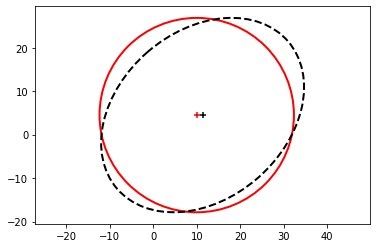

In [4]:
import numpy as np
from filterpy.kalman import predict
from filterpy.stats import plot_covariance_ellipse


dt = 0.3
F = np.array([[1, dt], [0, 1]])
x = np.array([10.0, 4.5])
P = np.diag([500, 500])
plot_covariance_ellipse(x, P, edgecolor='r')
x, P = predict(x, P, F, Q=0)
plot_covariance_ellipse(x, P, edgecolor='k', ls='dashed')

In [5]:
x, P

(array([11.35,  4.5 ]), array([[545., 150.],
        [150., 500.]]))

In [6]:
from filterpy.common import Q_discrete_white_noise
Q = Q_discrete_white_noise(dim=2, dt=1.0, var=2.35)
print(Q)

[[0.5875 1.175 ]
 [1.175  2.35  ]]
